In [1]:
import pandas as pd

from preprocessing import data_preprocess
from models import make_ds, train_models, plot_rocs

In [2]:
data = pd.read_csv('archive/atp_matches_2000.csv')
data = data_preprocess(data)
data.head()

,surface,draw-size,tourney_level,player0_id,player0_name,player0_hand,player0_ht,player0_ioc,player0_age,player0_rank,...,p1_ace,p1_df,p1_svpt,p1_1stIn,p1_1stWon,p1_2ndWon,p1_SvGms,p1_bpSaved,p1_bpFaced,winner
0,1,1,0,102776,Andrew Ilie,1,0.363636,2,0.357283,0.042132,...,0.216216,0.047619,0.497942,0.510345,0.462185,0.527273,0.384615,0.636364,0.500000,1
1,1,1,0,103602,Fernando Gonzalez,1,0.454545,9,0.121358,0.301806,...,0.000000,0.000000,0.213992,0.151724,0.100840,0.309091,0.230769,0.181818,0.300000,0
2,1,1,0,103387,Paradorn Srichaphan,1,0.515152,37,0.183396,0.087704,...,0.054054,0.095238,0.246914,0.255172,0.176471,0.181818,0.179487,0.272727,0.333333,0
3,1,1,0,101733,Jan Siemerink,0,0.454545,27,0.688755,0.091144,...,0.108108,0.285714,0.407407,0.379310,0.285714,0.436364,0.358974,0.272727,0.366667,0
4,1,1,0,101826,Alex Lopez Moron,1,0.212121,16,0.654340,0.094583,...,0.081081,0.000000,0.185185,0.172414,0.176471,0.290909,0.205128,0.045455,0.033333,1


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
dataset = make_ds(data, train_split=0.2, shuffle=True)

In [8]:
models = [
    LogisticRegression(max_iter=2500),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    SGDClassifier()
]

models, preds = train_models(dataset, models)

Training model -> LogisticRegression(max_iter=2500)
Train acc: 88.468
Test acc: 86.229

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1095
           1       0.86      0.86      0.86      1127

    accuracy                           0.86      2222
   macro avg       0.86      0.86      0.86      2222
weighted avg       0.86      0.86      0.86      2222

Training model -> RandomForestClassifier()
Train acc: 100.000
Test acc: 85.914

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1095
           1       0.84      0.89      0.87      1127

    accuracy                           0.86      2222
   macro avg       0.86      0.86      0.86      2222
weighted avg       0.86      0.86      0.86      2222

Training model -> DecisionTreeClassifier()
Train acc: 100.000
Test acc: 76.643

              precision    recall  f1-score   support

           0       0.79      0.71      0.75

/home/sparsh/Desktop/Deep-Learning/deep-learning/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/sparsh/Desktop/Deep-Learning/deep-learning/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/sparsh/Desktop/Deep-Learning/deep-learning/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.

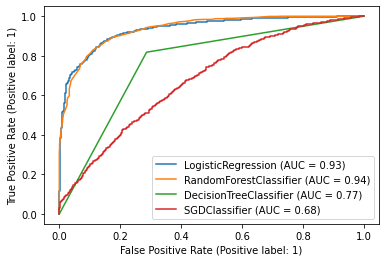

In [9]:
plot_rocs(dataset, models, preds)